## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

#### In this example, the null hypothesis is that Green wins or ties the election

In [6]:
# note: np.random.rand(n) < brown   -- comapres uniformly distributed numbers between 0 and 1 with the Brown fraction
# the np.where(...) .. , 'Brown', 'Green'  -- returns Brown if condition holds true, and returns Green otherwise
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [7]:
# sampling distribution
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<AxesSubplot:>

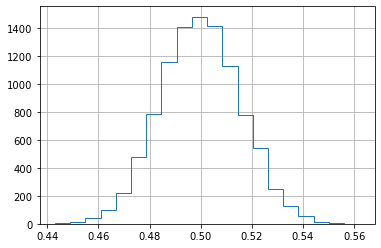

In [8]:
# histogram the sampling distribution
dist.Brown.hist(histtype='step',bins=20)

We see that 0.511 is not an extreme value

In [9]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

24.040000000000006

This shows the corresponding p-value of 24%.  Certainly not enough to reject the null that Green ties or wins.

In [10]:
largepoll = pd.read_csv('poll-larger.csv')

In [11]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [12]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

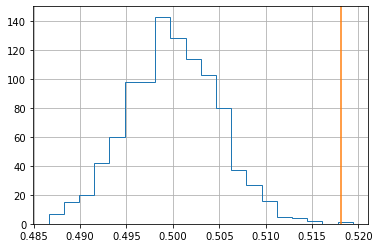

In [13]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

In [15]:
# Overlay Brown's value of .5181